<h1>Alejandro Regueiro Ruiz</h1>

In [927]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns

<h3>Extracción de datos del csv</h3>

In [928]:
path = "./csv/mafs.csv"

df = pd.DataFrame()
df = pd.read_csv(path)

<h3>Revisamos los datos del csv</h3>

In [929]:
df.head(10)

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0
5,3,1,New York City and Northern New Jersey,Vaughn Copeland,30,M,Field service technician,No,Divorced,1,1,1,1,0,0,0,0
6,4,2,New York City and Northern New Jersey,Jaclyn Methuen,30,F,Vodka saleswoman,Yes,Divorced,1,1,1,1,0,0,0,0
7,4,2,New York City and Northern New Jersey,Ryan Ranellone,28,M,Real estate agent,Yes,Divorced,1,1,1,1,0,0,0,0
8,5,2,New York City and Northern New Jersey,Davina Kullar (now Davis),34,F,Pharmaceutical saleswoman,No,Divorced,1,1,1,1,0,0,0,0
9,5,2,New York City and Northern New Jersey,Sean Varricchio,35,M,Trauma nurse,No,Divorced,1,1,1,1,0,0,0,0


<h3>Comprobamos el tipo de datos del dataframe</h3>

In [930]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Couple                68 non-null     int64 
 1   Season                68 non-null     int64 
 2   Location              68 non-null     object
 3   Name                  68 non-null     object
 4   Age                   68 non-null     int64 
 5   Gender                68 non-null     object
 6   Occupation            68 non-null     object
 7   Decision              68 non-null     object
 8   Status                68 non-null     object
 9   DrPepperSchwartz      68 non-null     int64 
 10  DrLoganLevkoff        68 non-null     int64 
 11  DrJosephCilona        68 non-null     int64 
 12  ChaplainGregEpstein   68 non-null     int64 
 13  PastorCalvinRoberson  68 non-null     int64 
 14  RachelDeAlto          68 non-null     int64 
 15  DrJessicaGriffin      68 non-null     int6

<h3>Convertimos datos y eliminamos las columnas que consideramos innecesarias</h3>

In [931]:
# Eliminamos la columna de nombre porque se considera irrelevante para el análisis
df.drop('Name', axis=1, inplace=True)

categorical_features = [
    'Location','Gender','Occupation','Decision','Status'
]

le = LabelEncoder()
for col in categorical_features:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

<h3>Volvemos a revisar el tipo de datos despues de la transformación</h3>

In [932]:
df.head(10)

,Couple,Season,Location,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,5,27,0,42,1,1,1,1,1,1,0,0,0,0
1,1,1,5,31,1,60,1,1,1,1,1,1,0,0,0,0
2,2,1,5,26,0,34,1,0,1,1,1,1,0,0,0,0
3,2,1,5,27,1,26,1,0,1,1,1,1,0,0,0,0
4,3,1,5,33,0,48,0,0,1,1,1,1,0,0,0,0
5,3,1,5,30,1,19,0,0,1,1,1,1,0,0,0,0
6,4,2,5,30,0,67,1,0,1,1,1,1,0,0,0,0
7,4,2,5,28,1,49,1,0,1,1,1,1,0,0,0,0
8,5,2,5,34,0,46,0,0,1,1,1,1,0,0,0,0
9,5,2,5,35,1,64,0,0,1,1,1,1,0,0,0,0


In [933]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Couple                68 non-null     int64
 1   Season                68 non-null     int64
 2   Location              68 non-null     int64
 3   Age                   68 non-null     int64
 4   Gender                68 non-null     int64
 5   Occupation            68 non-null     int64
 6   Decision              68 non-null     int64
 7   Status                68 non-null     int64
 8   DrPepperSchwartz      68 non-null     int64
 9   DrLoganLevkoff        68 non-null     int64
 10  DrJosephCilona        68 non-null     int64
 11  ChaplainGregEpstein   68 non-null     int64
 12  PastorCalvinRoberson  68 non-null     int64
 13  RachelDeAlto          68 non-null     int64
 14  DrJessicaGriffin      68 non-null     int64
 15  DrVivianaColes        68 non-null     int64
dtypes: int64(1

<h3>Creamos un mapa de calor para ver la correlación entre los diferentes elementos del dataframe</h3>

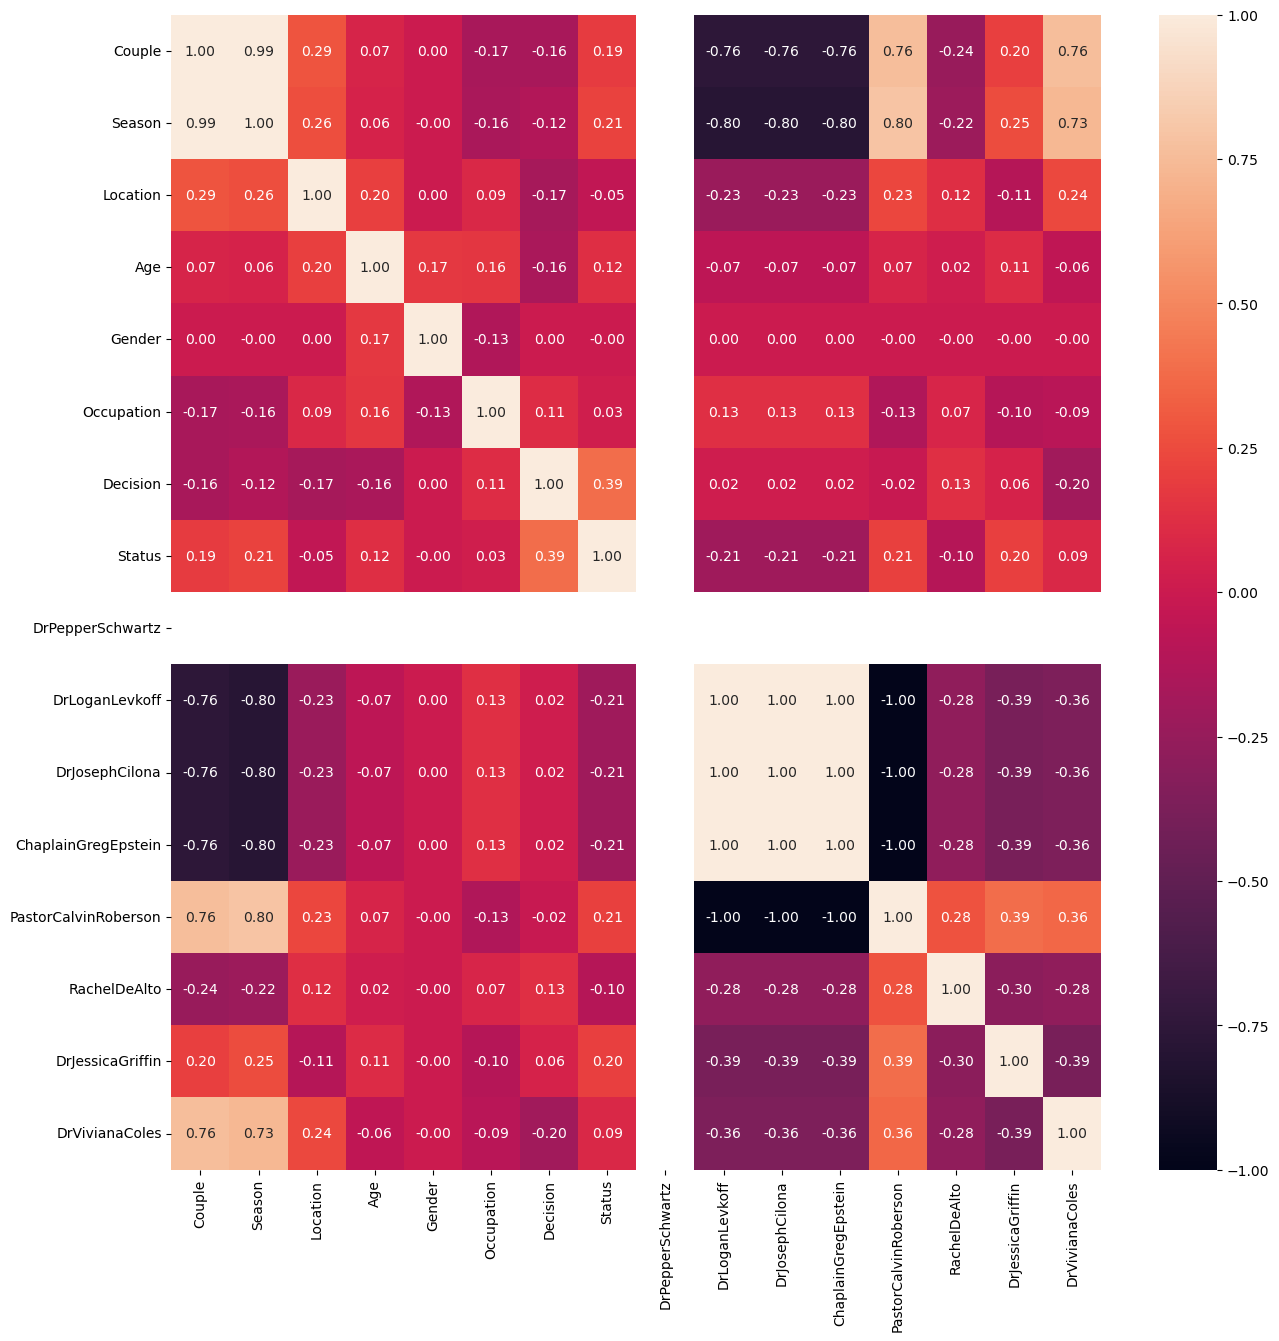

In [934]:
# Creamos un mapa de calor para comprobar las relaciones entre las columnas de nuestro dataframe, la columna con la que vamos a trabajar es Churn

corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

<h3>Añadimos los campos que vamos a utilizar para el análisis y creamos los campos de entrenamiento y prueba</h3>

Vamos a entrar un modelo de ia basade en el algoritmo de knn.

He decidido usar todos los campos del dataframe porque todos los datos iniciales son necesarios y la valoración de los Drs también porque considero que su decisión tiene un peso importante. 

A excepción del DrPepper, que como podemos observar el siempre cree que todo el mundo se va a quedar con su pajera y dije que si a todos, pero es bonito su resultado en la matriz de calor.
Aunque si utilizamos al DrPepper dentro de nuestro algoritmo podemos ver como podemos 
predecir con más exactitud a aquellas parejas que no han decidido seguir juntas, pero a costa de tener una peor precisión en aquellas que si, un poco irónico

El motivo por el que no he quitado el resto de datos, que el modelo sepa quien estaba emparejado con quién es una información vital bajo mi punto de vista, dado que le ayuda a tener en cuenta el resto de parámetros, pudiendo relacionar si gente con una edad similar y un trabajo similar se sienten más atraídos entre si dado que la diferencia económica y la diferencia de edad es menor.

La localización también la considero importante, porque el hecho de vivir separados, pero estando uno cerca de otro, puede llegar a fomentar que mantengan la relación sin que afecte mucho a su vida diaria y su privacidad

Un dato interesante es que si quitamos a todos los Drs. de la ecuación, sin tener en cuenta a nuestro DrPepper el señor cupido, podemos ver que nuestro modelo predice un poco mejor aquellos que no quieran permanecer juntos, pero otra vez a costo de los que si.

También nuestro análisis de KNN usando los parametros obtenidos por el método gridSearch también mejoran la precisión de 0.64 a 0.67

In [935]:
X = df[['Couple', 'Season', 'Location', 'Age', 'Gender', 'Occupation', 'Decision', 'DrLoganLevkoff', 'DrJosephCilona','ChaplainGregEpstein','PastorCalvinRoberson','RachelDeAlto','DrJessicaGriffin','DrVivianaColes']]
y = df['Status']

# Dado la pequeña cantidad de datos que tenemos voy a optar por usar el 50% de los datos como entrenamiento y el otro 50% como prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# Probando a estandarizar para ver si el valor dado era mejor pero con tan pocos datos y un rango de valores tan pequeño los resultados son iguales
#scaler = StandardScaler()
#X = scaler.fit(X)

<h3>Como el valor que queremos predecir es un valor binario, voy a probar primero con un modelo de regresión logística</h3>

En este modelo en concreto tenemos un cantidad de datos demasiado pequeña, 
lo que hace que el modelo suelte un error y no funcione, para que este modelo funcione en este caso con estos datos necesita que el test sea un 80%.

Por el contrario si intentamos usar el test de 80%, el modelo de KNN es el que se queja

Voy a dejar el modelo entero comentado para poder seguir probando otros modelos con una cantidad de datos 
mayor en el entrenamiento, dejo en markdown el resultado para que no sea necesario ejecutarlo

In [936]:
modelo_logistico = LogisticRegression()
modelo_logistico.fit(X_train, y_train)
y_pred_logistico = modelo_logistico.predict(X_test)

c:\Users\alejandro.regueiroru\AppData\Local\miniconda3\envs\MachineLearning\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [937]:
# Evaluar Regresión Logística
#cm = confusion_matrix(y_test, y_pred_logistico)
#accuracy = accuracy_score(y_test, y_pred_logistico)

#print(f"\nRegresión Logística - Precisión: {accuracy:.2f}")
#print("\nReporte de Clasificación:")
#print(classification_report(y_test, y_pred_logistico))

Regresión Logística - Precisión: 0.67

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        40
           1       0.41      0.47      0.44        15

    accuracy                           0.67        55
   macro avg       0.60      0.61      0.60        55
weighted avg       0.69      0.67      0.68        55

<h3>Dejo también el codigo para mostrar la grafica de la matriz de confusión</h3>

In [938]:
# Graficar la matriz de confusión
#plt.figure(figsize=(8, 6))
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No spam", "spam"], yticklabels=["No spam", "spam"])
#plt.title('Matriz de Confusión - Clasificación Binaria')
#plt.xlabel('Predicción')
#plt.ylabel('Real')
#plt.show()

<h3>Y también el de la curva roc(La precisión dada con el tamaño de test de 0.8 es de 0.65)</h3>

In [939]:
# Realizar predicciones con el conjunto de prueba (probabilidades) para ROC
#y_pred_prob = modelo_logistico.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva (1)

# Calcular la curva ROC
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el AUC (Área Bajo la Curva)
#roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
#plt.figure(figsize=(8, 6))
#plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea aleatoria (AUC = 0.5)
#plt.xlabel('Tasa de Falsos Positivos (FPR)')
#plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
#plt.title('Curva ROC - Clasificación Binaria Sencilla')
#plt.legend(loc='lower right')
#plt.show()

#print(f'AUC: {roc_auc:.2f}')

<h3>Ahora vamos a probar con el modelo Bernoulli de Naive_Bayes que es el que tenemos que usar en casos de predicción binaria</h3>

In [940]:
# Initialize the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Train the classifier
bnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bnb.predict(X_test)

# Print the classification report with zero_division parameter set to 1
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.50      0.50      0.50        10

    accuracy                           0.71        34
   macro avg       0.65      0.65      0.65        34
weighted avg       0.71      0.71      0.71        34



<Axes: >

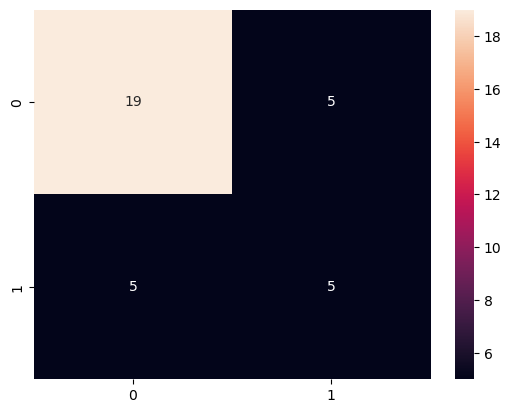

In [941]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

<h3>Ahora vamos a hacer una prueba con KNN, no considero que tenga el mismo peso que los 2 métodos anteriores(aunque regresión logística necesite de más datos) pero creo que su resultado puede ser un factor a tener en cuenta</h3>

<h4>Creamos primero los parametros que vamos a querer buscar</h4>

In [942]:
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

<h4>Probamos primero a hacer una busqueda de parametros óptimos usando GridSearchCV</h4>

In [943]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

best_params_grid = grid_search.best_params_
print(f"Mejores hiperparámetros (GridSearchCV): {best_params_grid}")

Mejores hiperparámetros (GridSearchCV): {'algorithm': 'auto', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}


Ejecutamos el modelo KNN con los parametros recogidos del gridSearch y calcularemos la precisión

In [944]:
knn = KNeighborsClassifier(
    n_neighbors=best_params_grid['n_neighbors'],
    weights=best_params_grid['weights'],
    algorithm=best_params_grid['algorithm'],
    p=best_params_grid['p']
).fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6470588235294118


<h4>También probamos con una busqueda random</h4>

In [945]:
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_iter=10, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)
random_search.score(X_test, y_test)

# Obtener los mejores hiperparámetros de RandomizedSearchCV
best_params_random = random_search.best_params_
print(f"Mejores hiperparámetros (RandomizedSearchCV): {best_params_random}")

Mejores hiperparámetros (RandomizedSearchCV): {'weights': 'uniform', 'p': 1, 'n_neighbors': 8, 'algorithm': 'kd_tree'}


Ejecutamos el modelo KNN con los parametros recogidos del randomSearch y calcularemos la precisión

In [946]:
knn2 = KNeighborsClassifier(
    n_neighbors=best_params_random['n_neighbors'],
    weights=best_params_random['weights'],
    algorithm=best_params_random['algorithm'],
    p=best_params_random['p']
).fit(X_train, y_train)

y_pred = knn2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7058823529411765


Como podemos observar en este caso con una busqueda de diferentes parametros y un rango de vecinos de 20 la precisión encontrada por el randomSearch es un poco mejor que la encontrada por gridSearch, un dato curioso dado que un gridSearch suele dar mejores resultados dado que gasta más tiempo haciendo un análisis de los datos para encontrar el patrón más óptimo

<h4>Creamos un rango de valores para el número de vecinos (neighbors) y calculamos la precisión (accuracy) del modelo KNN para cada valor de vecino. Almacenamos las precisiones en los diccionarios train_accuracies y test_accuracies respectivamente.</h4>

In [947]:
# Crear vecinos
neighbors = np.arange(1,20)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  	# escogemos KNN Classifier
	knn = KNeighborsClassifier(neighbor)
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Calcular accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test) 
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 
 {np.int64(1): 1.0, np.int64(2): 0.7941176470588235, np.int64(3): 0.8235294117647058, np.int64(4): 0.7941176470588235, np.int64(5): 0.7941176470588235, np.int64(6): 0.7647058823529411, np.int64(7): 0.7647058823529411, np.int64(8): 0.7647058823529411, np.int64(9): 0.7647058823529411, np.int64(10): 0.7647058823529411, np.int64(11): 0.7647058823529411, np.int64(12): 0.7647058823529411, np.int64(13): 0.7647058823529411, np.int64(14): 0.7647058823529411, np.int64(15): 0.7647058823529411, np.int64(16): 0.7647058823529411, np.int64(17): 0.7647058823529411, np.int64(18): 0.7647058823529411, np.int64(19): 0.7647058823529411} 
 {np.int64(1): 0.6176470588235294, np.int64(2): 0.6470588235294118, np.int64(3): 0.6176470588235294, np.int64(4): 0.6764705882352942, np.int64(5): 0.6764705882352942, np.int64(6): 0.7352941176470589, np.int64(7): 0.7058823529411765, np.int64(8): 0.7058823529411765, np.int64(9): 0.7058823529411765, np.int64(10): 0.

Creamos un gráfico que muestra lo que varía el nº de vecinos con respecto a nuestra predicción.

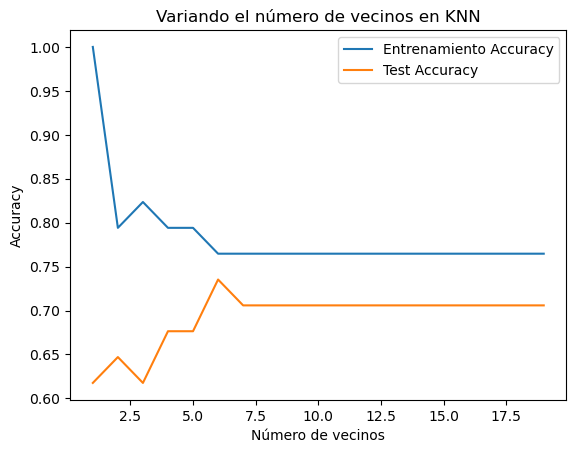

In [948]:
plt.title("Variando el número de vecinos en KNN")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Entrenamiento Accuracy") 

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Test Accuracy") 

plt.legend()
plt.xlabel("Número de vecinos")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

Como podemos observar nuestros modelos grid y random, han predicho los vecinos 2 y 8.
Con esta gráfica podemos observar como randomSearch está mas cerca del resultado óptimo pero aun así vemos que el vecino nº6 es el que tiene mayor indice de precisión

Probamos a utilizar el vecino nº6 para ver si en efecto la precisión es superior, vamos a utilizar solo el vecino y no usar mas hiperparámetros

In [949]:
knn3 = KNeighborsClassifier(
    n_neighbors=6
).fit(X_train, y_train)

y_pred = knn3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7352941176470589


Como podemos comprobar la precisión en efecto es mayor, un dato interesante es que si mantenemos los demás hiperparámetros en lugar de eliminarlos la precisión disminuye a un 0.67

<h3>Ahora por curiosidad voy a hacer pruebas con otros modelos diferentes que no creo que estén relacionados con la lógica binaria de estos datos pero que pueden dar lugar a datos interesantes</h3>

<h4>Vamos a probar con el método Gauss, aunque se suele trabajar con el más en valores de datos numéricos no binarios, puede que su resultado tenga una fuerte presencia</h4>

In [950]:
# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75        24
           1       0.50      0.90      0.64        10

    accuracy                           0.71        34
   macro avg       0.72      0.76      0.70        34
weighted avg       0.81      0.71      0.72        34



Si comparamos el método Gaussiano con el Método Bernoulli, podemos obsevar como el primero es capaz de predecir con mayor exactitud a aquellas parejar que todavía están juntas, mientrás que Bernoulli es capaz de predecir con mayor exactitud a aquellas parejas que no permanecerán juntas.

<h4>Vamos a probar con el método Multinomial, aunque se suele trabajar con el más en valor textuales</h4>

In [951]:
# Initialize the Logistic Regression classifier
mnb = MultinomialNB()

# Train the classifier
mnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80        24
           1       0.33      0.10      0.15        10

    accuracy                           0.68        34
   macro avg       0.52      0.51      0.48        34
weighted avg       0.60      0.68      0.61        34



Podemos observar que no es muy preciso, siendo una versión inferior al método de Bernoulli dado que predice de manera similar a aquellos que no van a permanecer juntos, pero con resultado mucho peores en aquellas parejas que si quieren seguir juntos.

<h2>Conclusión final: Dependiendo del propósito con el que queramos trabajar con estos datos, si queremos tener mayor exactitud en relación a que las parejas si permanezcan juntas, yo usaría el método de Gauss, si por el contrario queremos centrarnos más en aquellas parejas que no han querido seguir juntas, usaría el método de Bernoulli. (Regresión Logística queda descartada por la ínfima cantidad de datos que tenemos, pero sería un interesante candidato dado que con tan poco entrenamiento está cerca de tener una aproximación similar al método de Gauss)</h2>